In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-dataset/diabetes_data.csv
/kaggle/input/health-dataset/hypertension_data.csv
/kaggle/input/health-dataset/stroke_data.csv


In [41]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegressionCV

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report,ConfusionMatrixDisplay, f1_score, recall_score

In [3]:
df = pd.read_csv("/kaggle/input/health-dataset/diabetes_data.csv")
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


# columns description:
Sex - 1--male and 0--female

HighChol - High Cholestrol ---- (Yes-1 or No-0)

CholCheck - Patient Cholestrol check in past 5 years ---- (Yes-1 or No-0)

BMI - Body Mass Index

Smoker - patient is smoker ---- (Yes-1 or No-0)

HeartDiseaseorAttack - CHD (coronary heart disease) or MI (myocardial infarction) ---- (Yes-1 or No-0)

PhysActivity - Physical activity in past 30 days ---- (Yes-1 or No-0)

Fruits - Consume Fruit 1 or more times per day ---- (Yes-1 or No-0)

Veggies - Consumes Veggies 1 or more times per day ---- (Yes-1 or No-0)

HvyAlcoholConsump - Heavy alchol taking ---- (Yes-1 or No-0)

GenHlth - Scale of Health from 1 to 5 ---- ( 1-Excellent, 2-Very_good, 3-Good, 4-fair, 5-poor)

MentHlth - Number of poor mental health days scale ---- (1-30 days)

PhysHlth - physical illness or injuries in past 30 days scale ---- (1-30 days)

DiffWalk - have serious difficulty walking or climbing stairs? ---- (Yes-1 or NO-0)

Stroke - Have you faced any strokes before? ---- (Yes-1 or NO-0)

HighBP - Have High BP? (Yes-1 or NO-0)

Our Target column -> Diabetes - (Yes-1 or No-0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [5]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [6]:
df.shape

(70692, 18)

In [7]:
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


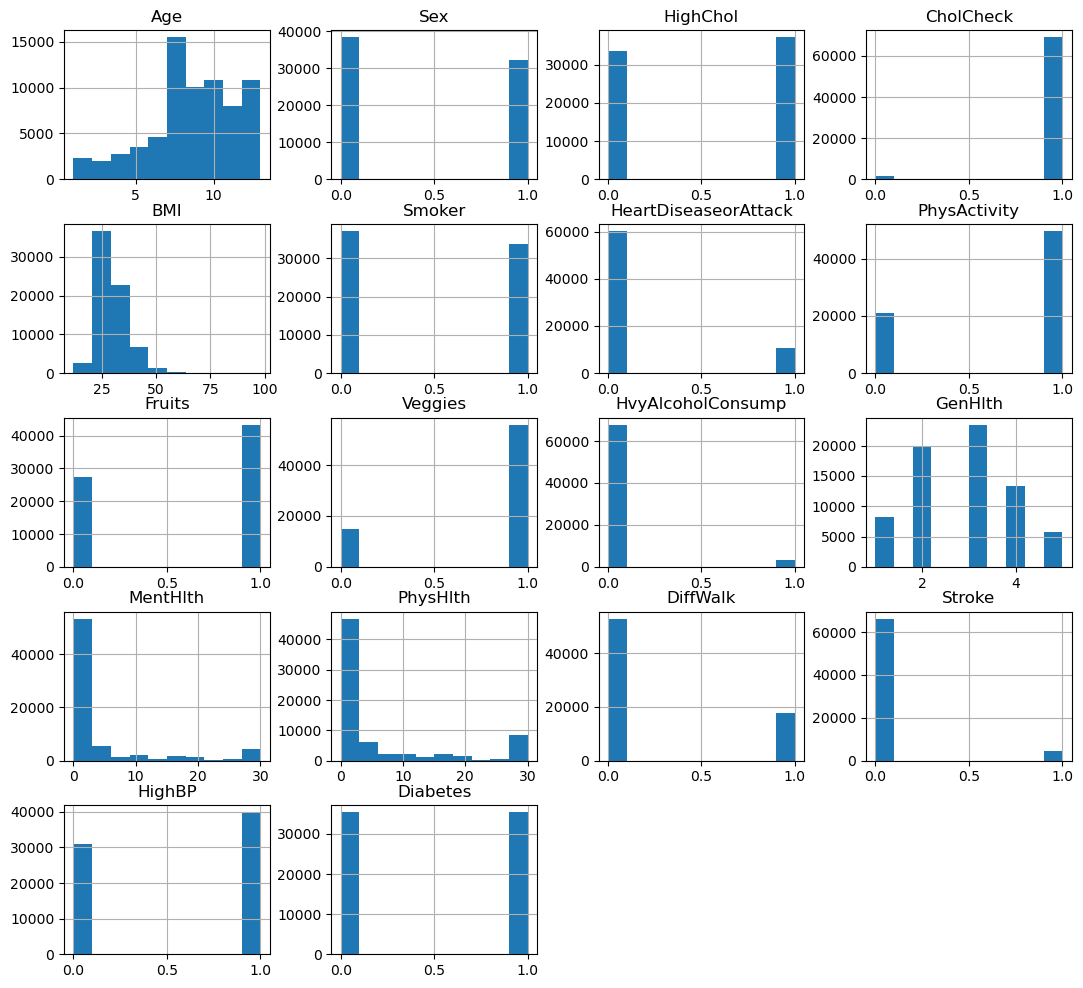

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(13,12))
plt.show()

<AxesSubplot:>

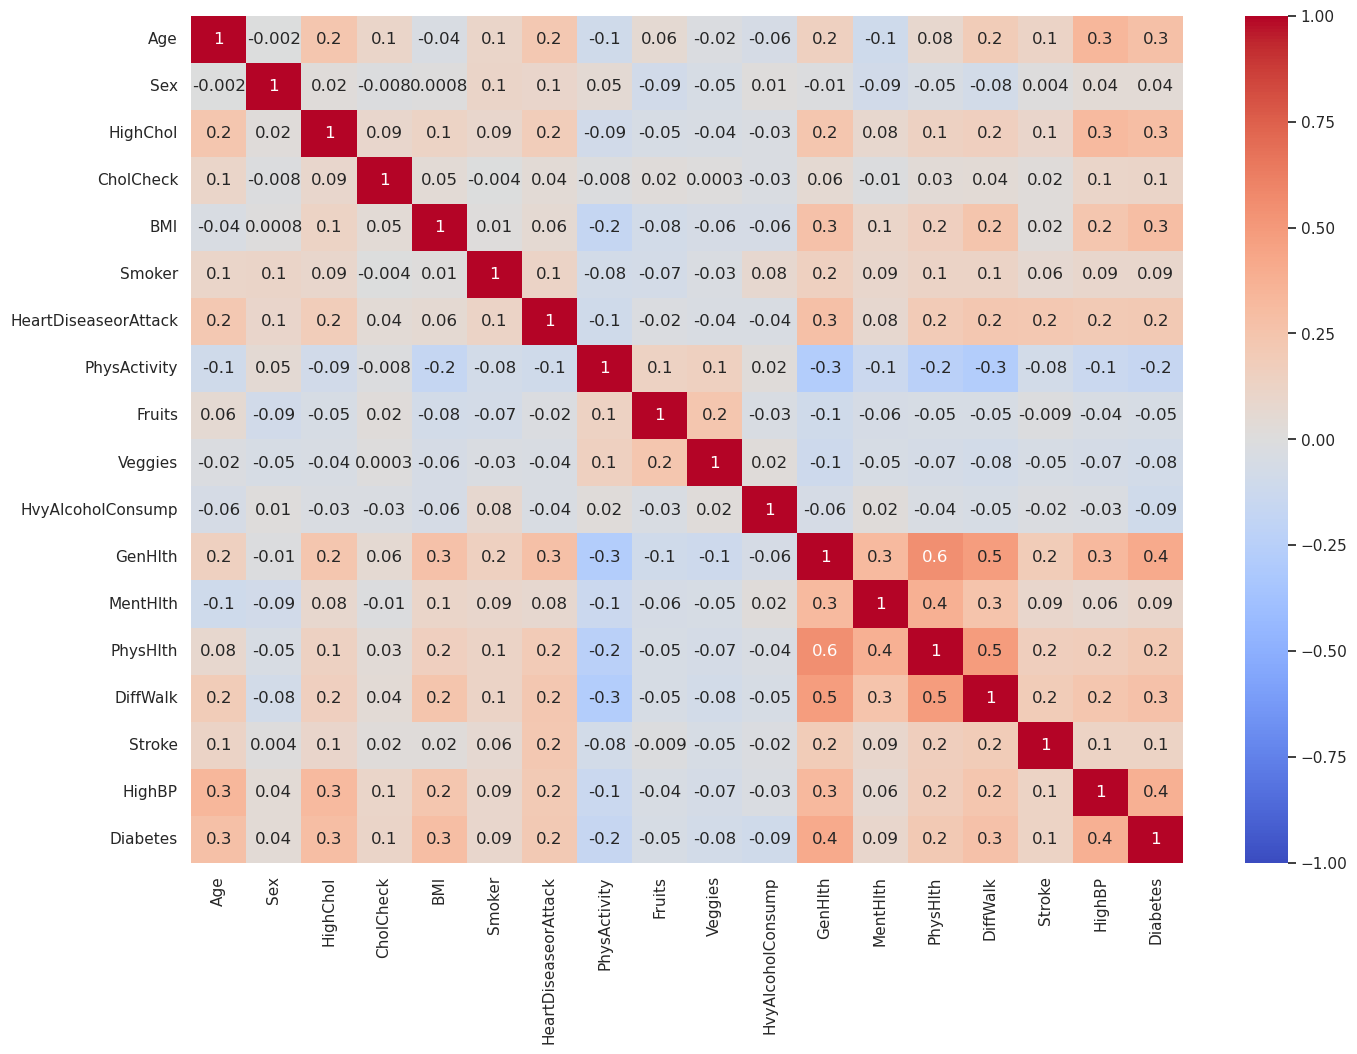

In [10]:
# Correlation between any two features
# check for possible co-variates

sns.set(rc = {'figure.figsize':(16,11)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

In [11]:
# take wanted columns (Feature selection)
# And don't consider the columns with less category values.

df1 = df[['Age','Sex','HighChol','BMI','Smoker','GenHlth','MentHlth','PhysHlth','HighBP','Diabetes']]
df1.head(4)

,Age,Sex,HighChol,BMI,Smoker,GenHlth,MentHlth,PhysHlth,HighBP,Diabetes
0,4.0,1.0,0.0,26.0,0.0,3.0,5.0,30.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1.0,3.0,0.0,0.0,1.0,0.0
2,13.0,1.0,0.0,26.0,0.0,1.0,0.0,10.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,3.0,0.0,3.0,1.0,0.0


In [12]:
df1.isnull().sum()

Age         0
Sex         0
HighChol    0
BMI         0
Smoker      0
GenHlth     0
MentHlth    0
PhysHlth    0
HighBP      0
Diabetes    0
dtype: int64

<AxesSubplot:>

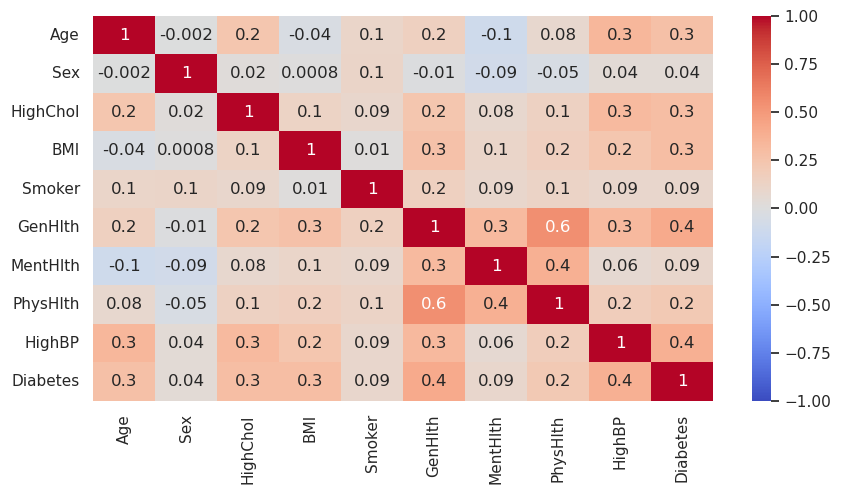

In [13]:
# Correlation between any two features
# check for possible co-variates

sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(df1.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

In [14]:
#df1.drop(columns=['PhysActivity'],inplace=True)

In [15]:
df1.head(5)

,Age,Sex,HighChol,BMI,Smoker,GenHlth,MentHlth,PhysHlth,HighBP,Diabetes
0,4.0,1.0,0.0,26.0,0.0,3.0,5.0,30.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1.0,3.0,0.0,0.0,1.0,0.0
2,13.0,1.0,0.0,26.0,0.0,1.0,0.0,10.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,3.0,0.0,3.0,1.0,0.0
4,8.0,0.0,0.0,29.0,1.0,2.0,0.0,0.0,0.0,0.0


In [16]:
df1.Diabetes.value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

In [17]:
df1.size

706920

In [18]:
df1.isnull().sum()

Age         0
Sex         0
HighChol    0
BMI         0
Smoker      0
GenHlth     0
MentHlth    0
PhysHlth    0
HighBP      0
Diabetes    0
dtype: int64

In [19]:
df1.head(5)

,Age,Sex,HighChol,BMI,Smoker,GenHlth,MentHlth,PhysHlth,HighBP,Diabetes
0,4.0,1.0,0.0,26.0,0.0,3.0,5.0,30.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1.0,3.0,0.0,0.0,1.0,0.0
2,13.0,1.0,0.0,26.0,0.0,1.0,0.0,10.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,3.0,0.0,3.0,1.0,0.0
4,8.0,0.0,0.0,29.0,1.0,2.0,0.0,0.0,0.0,0.0


In [20]:
#Check skewness
#can only be checked for numeric data

# I got this code from others notebook

df1_skew = df1[['BMI','Age','GenHlth','MentHlth','PhysHlth']]
skew = pd.DataFrame(df1_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
BMI,1.719180,True
Age,-0.545923,False
GenHlth,0.171991,False
MentHlth,2.388110,True
PhysHlth,1.657304,True


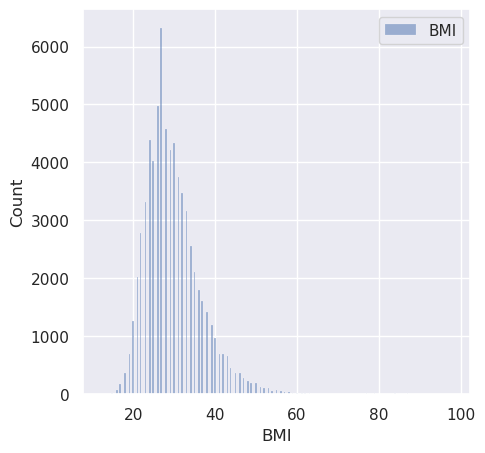

In [21]:
sns.set(rc={"figure.figsize":(5,5)})
sns.histplot(data=df1, x='BMI', color="C{}".format(0), label='BMI', alpha=0.5)
plt.legend()
plt.show()

In [22]:
## minmax scalar on PhysHlth and BMI columns :
from sklearn.preprocessing import MinMaxScaler
scalar= MinMaxScaler()

df1[['PhysHlth']] = scalar.fit_transform(df1[['PhysHlth']])
df1[['BMI']] = scalar.fit_transform(df1[['BMI']])
df1[['MentHlth']] = scalar.fit_transform(df1[['MentHlth']])



# Applying Box-Cox Transform

#pt = PowerTransformer()

#df1[['PhysHlth']] = pt.fit_transform(df1[['PhysHlth']]+0.000001)
#df1[['BMI']] = pt.transform(df1[['BMI']]+0.000001)
#df1[['MentHlth']] = pt.transform(df1[['MentHlth']])



df1_skew = df1[['BMI','Age','GenHlth','MentHlth','PhysHlth']]
skew = pd.DataFrame(df1_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,skew,too_skewed
BMI,1.719180,True
Age,-0.545923,False
GenHlth,0.171991,False
MentHlth,2.388110,True
PhysHlth,1.657304,True


In [23]:
df1.Diabetes = df1.Diabetes.astype(int)
df1.head(3)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Age,Sex,HighChol,BMI,Smoker,GenHlth,MentHlth,PhysHlth,HighBP,Diabetes
0,4.0,1.0,0.0,0.162791,0.0,3.0,0.166667,1.000000,1.0,0
1,12.0,1.0,1.0,0.162791,1.0,3.0,0.000000,0.000000,1.0,0
2,13.0,1.0,0.0,0.162791,0.0,1.0,0.000000,0.333333,0.0,0


In [24]:
X = df1.drop(columns = ['Diabetes'])
y = df1.Diabetes

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=44, test_size=0.3)
print('X_train shape -',X_train.shape,'  ', 'X_test shape -',X_test.shape,'   ',  
      'y_train shape -', y_train.shape,'   ', 'y_test shape -', y_test.shape)

X_train shape - (49484, 9)    X_test shape - (21208, 9)     y_train shape - (49484,)     y_test shape - (21208,)


In [25]:
X_train.head(5)

,Age,Sex,HighChol,BMI,Smoker,GenHlth,MentHlth,PhysHlth,HighBP
45553,9.0,0.0,0.0,0.174419,0.0,3.0,0.0,0.0,1.0
13845,5.0,0.0,0.0,0.081395,1.0,1.0,0.0,0.0,0.0
58885,8.0,1.0,0.0,0.232558,0.0,3.0,0.0,0.0,0.0
5207,5.0,0.0,0.0,0.151163,1.0,2.0,0.0,0.0,0.0
27605,7.0,0.0,0.0,0.197674,1.0,2.0,0.0,0.0,1.0


In [26]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Accuracy score of log_reg : ", accuracy_score(y_test, y_pred))

Accuracy score of log_reg :  0.7407582044511505


In [27]:
from sklearn.tree import DecisionTreeClassifier
m1 = DecisionTreeClassifier()

m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)
print("Accuracy score : ", accuracy_score(y_test, y_pred))

Accuracy score :  0.6694172010562052


In [28]:
df1_skew = df1[['BMI','Age','GenHlth','MentHlth','PhysHlth']]
skew = pd.DataFrame(df1_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
BMI,1.719180,True
Age,-0.545923,False
GenHlth,0.171991,False
MentHlth,2.388110,True
PhysHlth,1.657304,True


In [29]:
from sklearn.preprocessing import QuantileTransformer

# create a QuantileTransformer object
scaler = QuantileTransformer(output_distribution='normal')

df1[['PhysHlth']] = scaler.fit_transform(df1[['PhysHlth']])
df1[['MentHlth']] = scaler.fit_transform(df1[['MentHlth']])
df1[['BMI']] = scaler.fit_transform(df1[['BMI']])


df1_skew = df1[['BMI','Age','GenHlth','PhysHlth']]
skew = pd.DataFrame(df1_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,skew,too_skewed
BMI,0.012761,False
Age,-0.545923,False
GenHlth,0.171991,False
PhysHlth,0.693503,False


In [30]:
df1.head(6)

,Age,Sex,HighChol,BMI,Smoker,GenHlth,MentHlth,PhysHlth,HighBP,Diabetes
0,4.0,1.0,0.0,-0.507774,0.0,3.0,0.897655,5.199338,1.0,0
1,12.0,1.0,1.0,-0.507774,1.0,3.0,-5.199338,-5.199338,1.0,0
2,13.0,1.0,0.0,-0.507774,0.0,1.0,-5.199338,0.817902,0.0,0
3,11.0,1.0,1.0,-0.091712,1.0,3.0,-5.199338,0.468203,1.0,0
4,8.0,0.0,0.0,0.064027,1.0,2.0,-5.199338,-5.199338,0.0,0
5,1.0,0.0,0.0,-2.456904,0.0,2.0,1.006211,-5.199338,0.0,0


In [31]:
X = df1.drop(columns = ['Diabetes'])
y = df1.Diabetes

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=44, test_size=0.2)
print('X_train shape -',X_train.shape,'  ', 'X_test shape -',X_test.shape,'   ',  
      'y_train shape -', y_train.shape,'   ', 'y_test shape -', y_test.shape)

X_train shape - (56553, 9)    X_test shape - (14139, 9)     y_train shape - (56553,)     y_test shape - (14139,)


In [32]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Accuracy score of log_reg : ", accuracy_score(y_test, y_pred))

Accuracy score of log_reg :  0.7424853242803593


In [33]:
# decision tree - grid search cv
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

# defining parameter range
param_grid = {'max_depth':[1,3,5,6,7,8,9,10],
              'max_features': [1,2,3,4,5,6,7,8,9]}  
gridDT = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, n_jobs=-1)
  
# fitting the model for grid search
gridDT.fit(X_train, y_train)

print(gridDT.best_params_)

{'max_depth': 7, 'max_features': 7}


In [34]:
y_pred_test_dt = gridDT.predict(X_test)
y_pred_train_dt = gridDT.predict(X_train)

print(accuracy_score(y_train, y_pred_train_dt))
print(accuracy_score(y_test, y_pred_test_dt))


0.7457429314094743
0.7373223000212179


<Figure size 500x500 with 0 Axes>

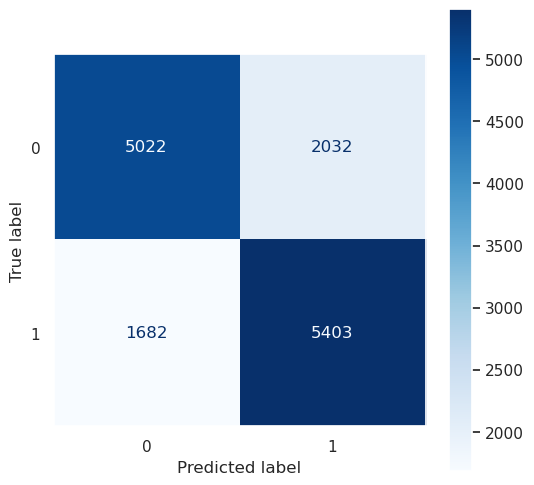

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test_dt, labels=gridDT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridDT.classes_)
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues) 
plt.grid(which='major')     #remove cell gridlines
plt.gcf().set_size_inches(6, 6)   # Adjust the size of the plot
plt.show()

In [36]:
# gridsearchcv Randomforest

rf = RandomForestClassifier(random_state=42)
rf = rf.fit(X_train, y_train)

# defining parameter range
param_grid = {'max_depth':[1,3,5,6,7,8,9,10],
              'max_features': [1,2,3,4,5,6,7,8,9]}  
gridRF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, n_jobs=-1)
  
# fitting the model for grid search
gridRF.fit(X_train, y_train)

print(gridRF.best_params_)

{'max_depth': 9, 'max_features': 3}


In [37]:
y_pred_test_rf = gridRF.predict(X_test)
y_pred_train_rf = gridRF.predict(X_train)

print(accuracy_score(y_train, y_pred_train_rf))
print(accuracy_score(y_test, y_pred_test_rf))


0.7604901596732269
0.7462338213452153


<Figure size 500x500 with 0 Axes>

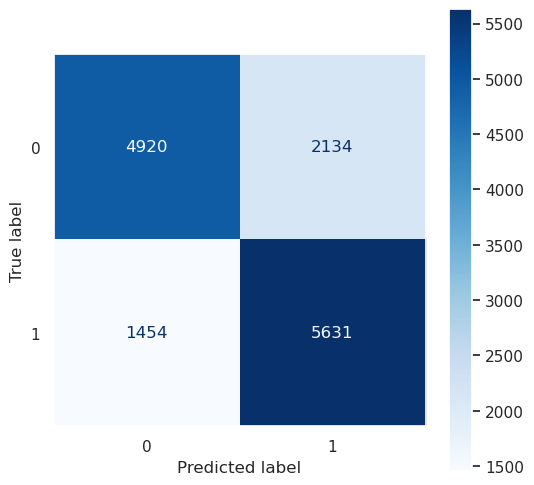

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test_rf, labels=gridRF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridRF.classes_)
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues) 
plt.grid(which='major')     #remove cell gridlines
plt.gcf().set_size_inches(6, 6)   # Adjust the size of the plot
plt.show()

In [39]:
# voting classifier :

rf = RandomForestClassifier(n_estimators=100, max_depth=7, max_features=8)
dt = DecisionTreeClassifier(max_depth= 7, max_features= 7)


ensemble = VotingClassifier(estimators=[('rf', rf), ('dt', dt)], voting='hard')

ensemble.fit(X_train, y_train)

y_pred_test_en = ensemble.predict(X_test)
y_pred_train_en = ensemble.predict(X_train)

print(accuracy_score(y_train, y_pred_train_en))
print(accuracy_score(y_test, y_pred_test_en))


0.748253850370449
0.7391611853737888


<Figure size 500x500 with 0 Axes>

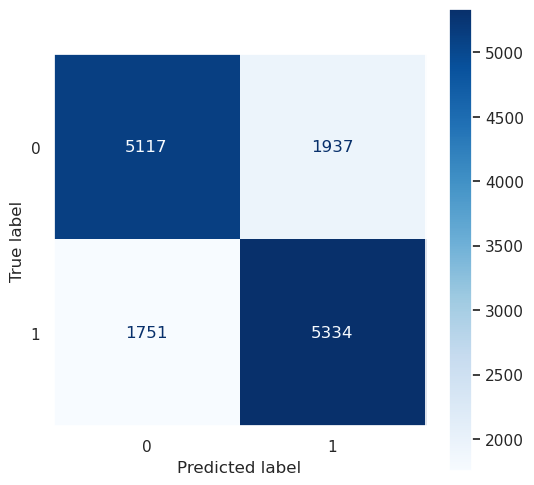

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test_en, labels=ensemble.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ensemble.classes_)
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues) 
plt.grid(which='major')     #remove cell gridlines
plt.gcf().set_size_inches(6, 6)   # Adjust the size of the plot
plt.show()

In [42]:
print("f1_score of y_train and y_pred",f1_score(y_train, y_pred_train_en))
print("f1_score of y_test and y_pred",f1_score(y_test, y_pred_test_en))

print("recall_score of y_train and y_pred",recall_score(y_train, y_pred_train_en))
print("recall_score of y_test and y_pred",recall_score(y_test, y_pred_test_en))

f1_score of y_train and y_pred 0.7502061584349503
f1_score of y_test and y_pred 0.7431039286709391
recall_score of y_train and y_pred 0.75648420084215
recall_score of y_test and y_pred 0.7528581510232887
